In [1]:
import pandas as pd

file_path = 'sales_06_FY2020-21.csv'

data = pd.read_csv(file_path)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

/var/folders/_b/p2mc6hd107g8ccjv1yqd571w0000gn/T/ipykernel_6514/1814089730.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(    order_id  order_date    status   item_id                  sku  \
 0  100354678  2020-10-01  received  574772.0   oasis_Oasis-064-36   
 1  100354678  2020-10-01  received  574774.0      Fantastic_FT-48   
 2  100354680  2020-10-01  complete  574777.0      mdeal_DMC-610-8   
 3  100354680  2020-10-01  complete  574779.0   oasis_Oasis-061-36   
 4  100367357  2020-11-13  received  595185.0  MEFNAR59C38B6CA08CD   
 
    qty_ordered  price   value  discount_amount   total  ...          SSN  \
 0         21.0   89.9  1798.0              0.0  1798.0  ...  627-31-5251   
 1         11.0   19.0   190.0              0.0   190.0  ...  627-31-5251   
 2          9.0  149.9  1199.2              0.0  1199.2  ...  627-31-5251   
 3          9.0   79.9   639.2              0.0   639.2  ...  627-31-5251   
 4          2.0   99.9    99.9              0.0    99.9  ...  627-31-5251   
 
      Phone No.  Place Name  County    City State    Zip Region User Name  \
 0  405-959-1129     Vinson  Harmon  

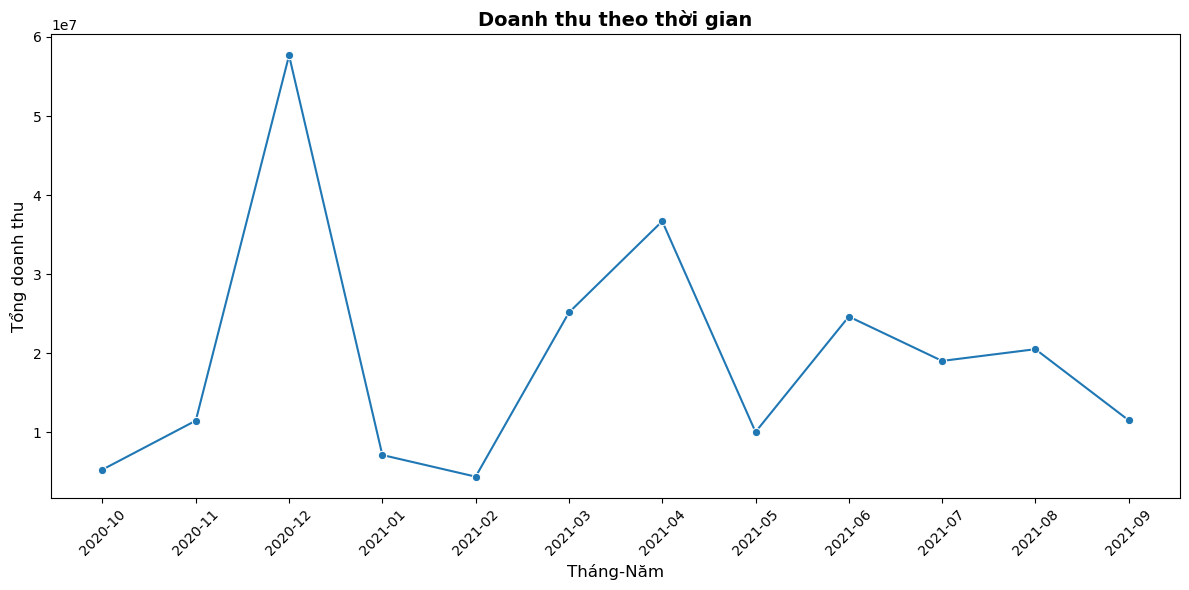

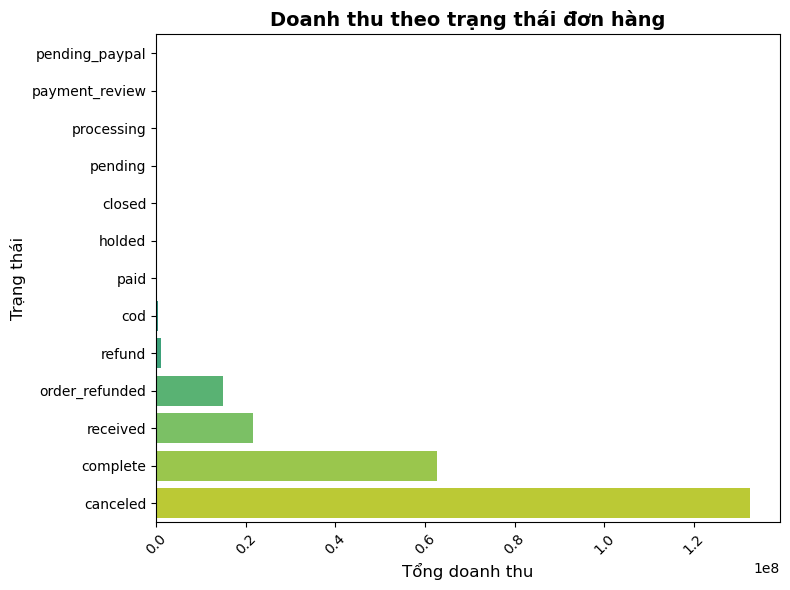

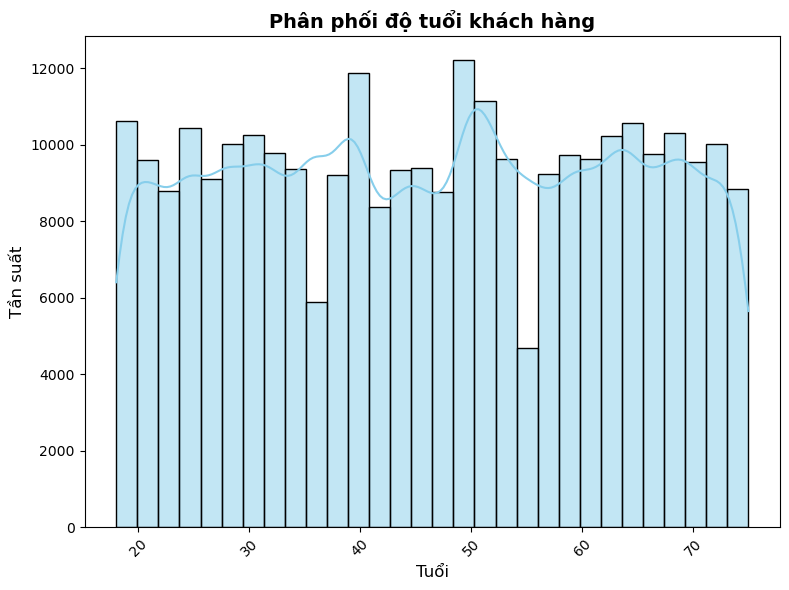

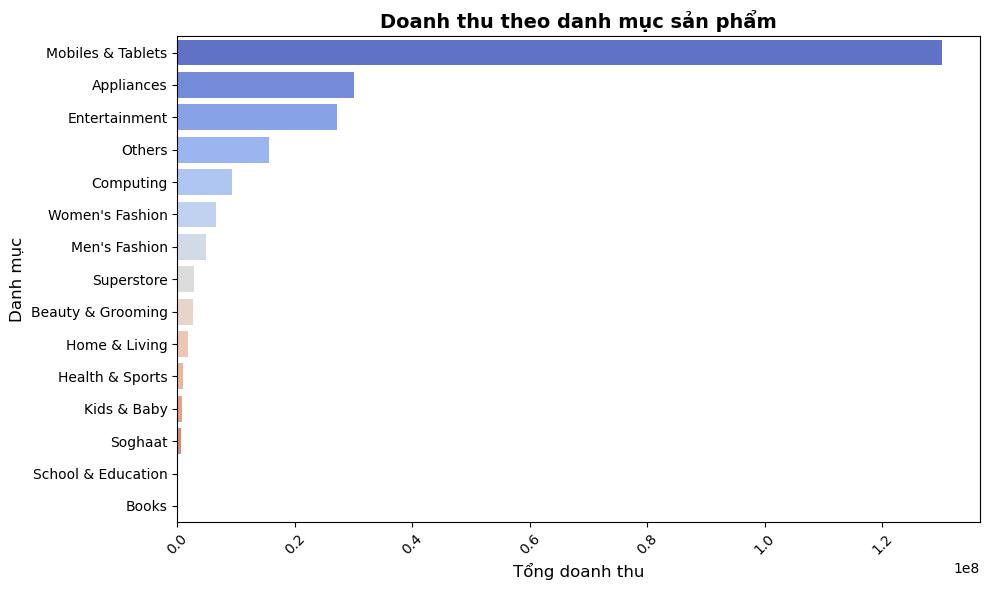

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert date-related columns for easier analysis
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['month_year'] = data['order_date'].dt.to_period('M')

# Function to format plots
def format_plot(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=14, weight='bold')
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

revenue_by_month = data.groupby('month_year')['total'].sum()

plt.figure(figsize=(12, 6))
ax1 = sns.lineplot(x=revenue_by_month.index.astype(str), y=revenue_by_month.values, marker='o')
format_plot(ax1, "Doanh thu theo thời gian", "Tháng-Năm", "Tổng doanh thu")

status_revenue = data.groupby('status')['total'].sum().sort_values()

plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x=status_revenue.values, y=status_revenue.index, palette='viridis')
format_plot(ax2, "Doanh thu theo trạng thái đơn hàng", "Tổng doanh thu", "Trạng thái")

plt.figure(figsize=(8, 6))
ax3 = sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
format_plot(ax3, "Phân phối độ tuổi khách hàng", "Tuổi", "Tần suất")

category_revenue = data.groupby('category')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax4 = sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='coolwarm')
format_plot(ax4, "Doanh thu theo danh mục sản phẩm", "Tổng doanh thu", "Danh mục")

plt.show()


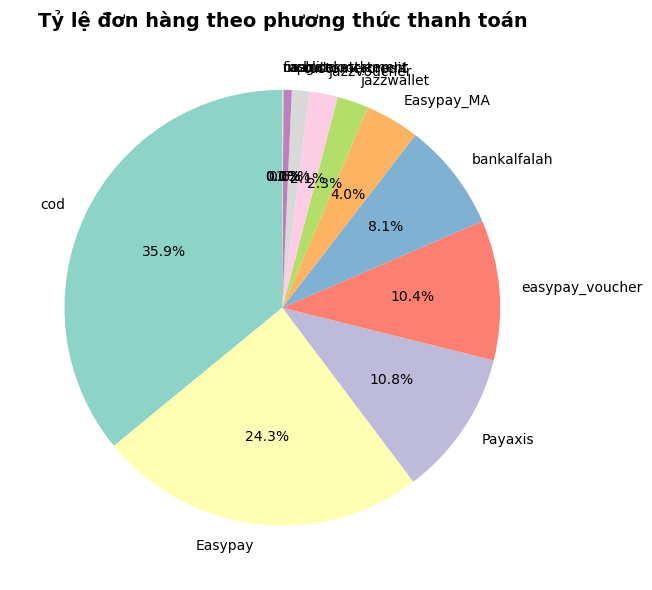

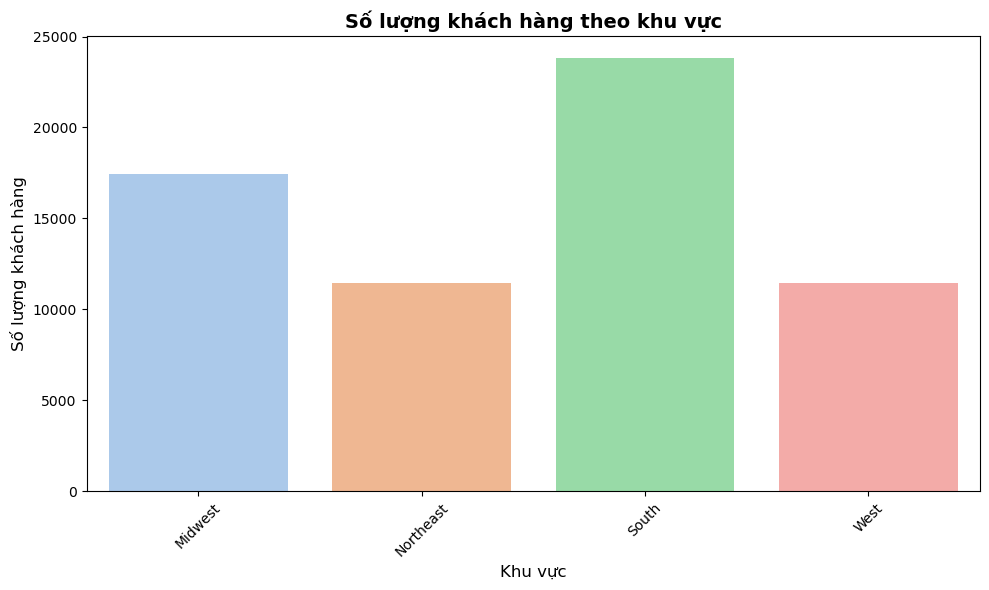

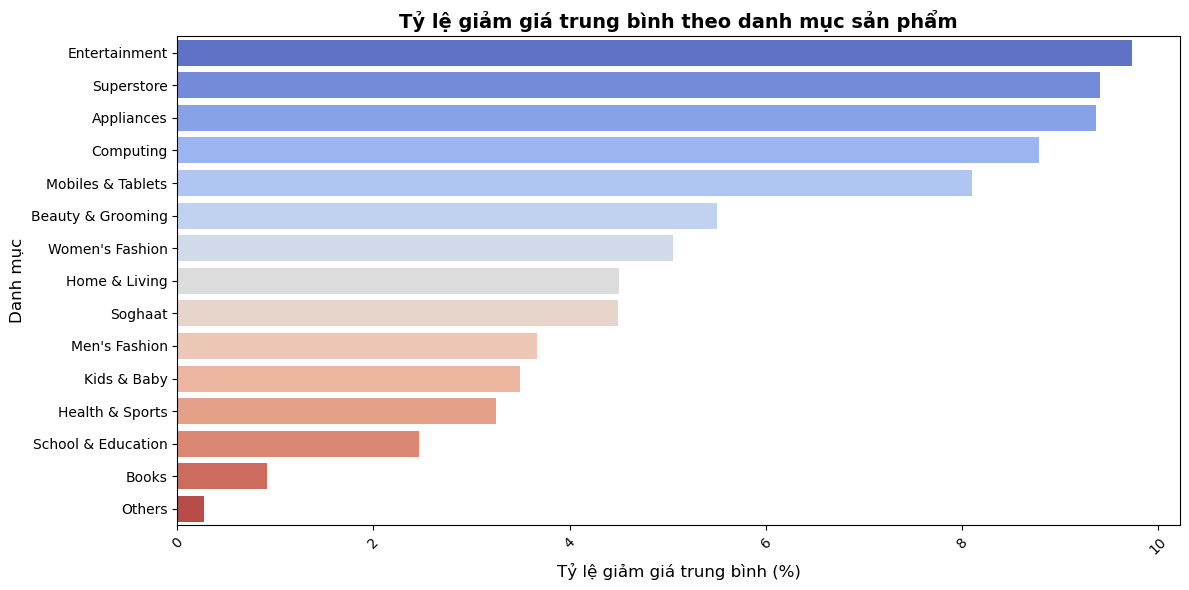

In [3]:
payment_method_counts = data['payment_method'].value_counts()

plt.figure(figsize=(8, 6))
ax1 = payment_method_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3"), startangle=90)
plt.title("Tỷ lệ đơn hàng theo phương thức thanh toán", fontsize=14, weight='bold')
plt.ylabel("")  # Hide the y-label
plt.tight_layout()
plt.show()

customers_by_region = data.groupby('Region')['cust_id'].nunique()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette='pastel')
format_plot(ax2, "Số lượng khách hàng theo khu vực", "Khu vực", "Số lượng khách hàng")
plt.show()

discount_by_category = data.groupby('category')['Discount_Percent'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax4 = sns.barplot(x=discount_by_category.values, y=discount_by_category.index, palette='coolwarm')
format_plot(ax4, "Tỷ lệ giảm giá trung bình theo danh mục sản phẩm", "Tỷ lệ giảm giá trung bình (%)", "Danh mục")
plt.show()


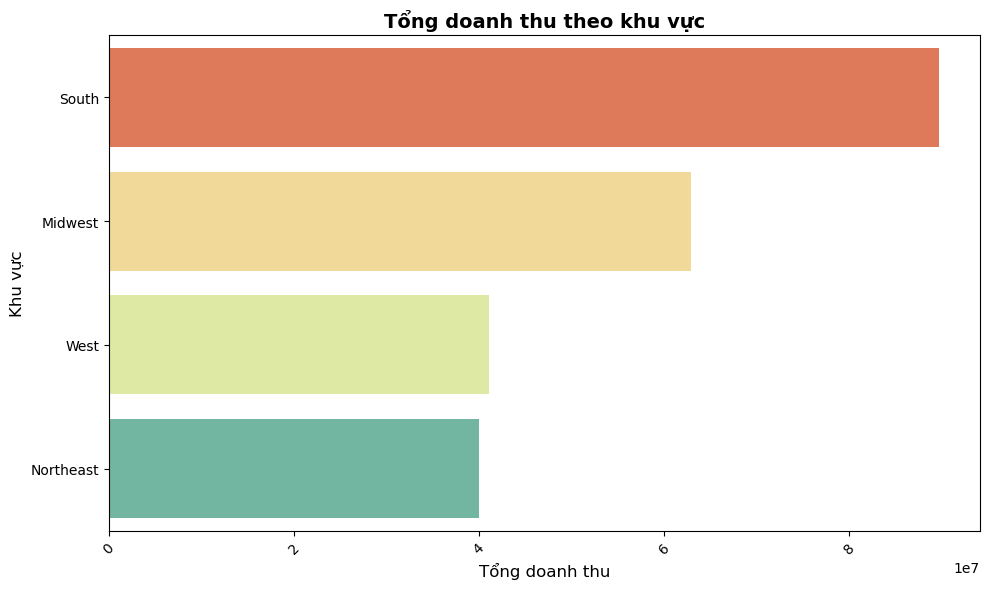

In [4]:
revenue_by_region = data.groupby('Region')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='Spectral')
format_plot(ax, "Tổng doanh thu theo khu vực", "Tổng doanh thu", "Khu vực")
plt.show()


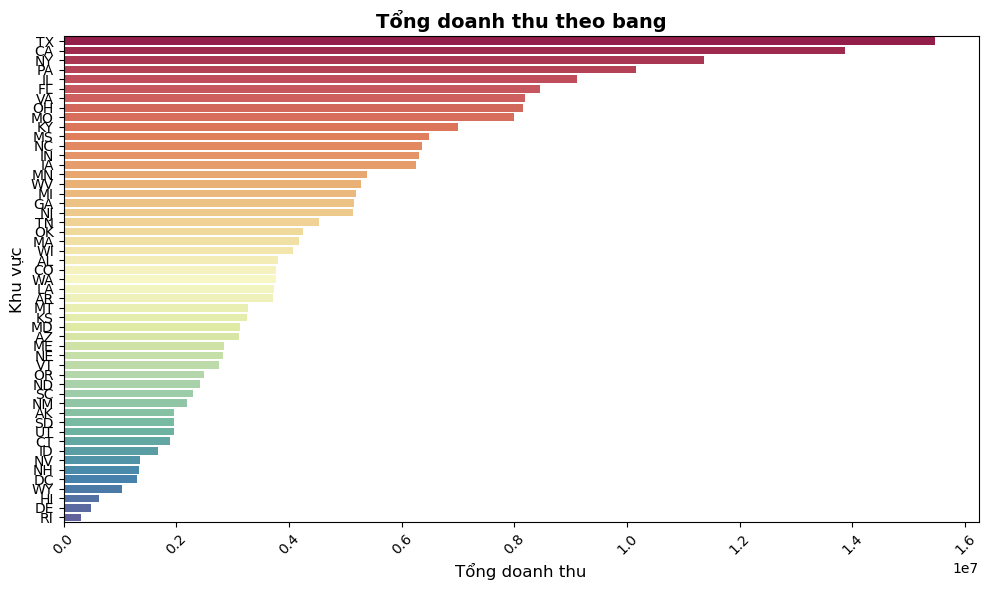

In [6]:
revenue_by_region = data.groupby('State')['total'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='Spectral')
format_plot(ax, "Tổng doanh thu theo bang", "Tổng doanh thu", "Khu vực")
plt.show()
